In [1]:
# SINGLE NEURON

from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
# SIMPLE NEURAL NETWORK OF 3 Layers
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

Training data shape: (16512, 8)
Training labels shape: (16512,)
Validation data shape: (4128, 8)
Validation labels shape: (4128,)
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 165462.2969 - val_loss: 112487.9062
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110078.9766 - val_loss: 86305.1875
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84356.5938 - val_loss: 80464.6328
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78700.1719 - val_loss: 78591.1562
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77271.5391 - val_loss: 77416.8906
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76859.7578 - val_loss: 73810.4062
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75087.0312 - val_loss: 72750.2344
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71502.5078 - val_loss: 70191.2578
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70382.8438 - val_loss: 69623.7969
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 

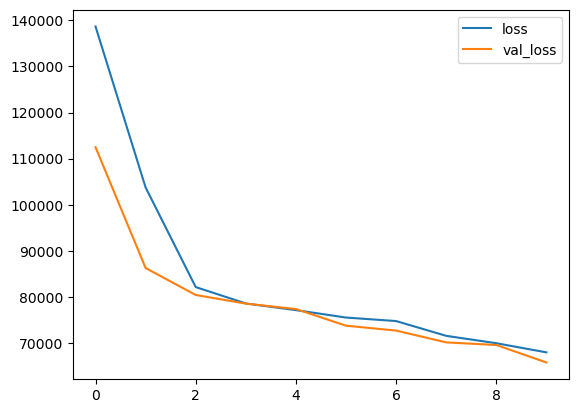

In [4]:
# SIMPLE PROBLEM - Housing Price Prediction Regression
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

# Load the California Housing dataset
(X_train, y_train), (X_valid, y_valid) = keras.datasets.california_housing.load_data(
    version="large", path="california_housing.npz", test_split=0.2, seed=113
)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_valid.shape)
print("Validation labels shape:", y_valid.shape)

# Create the model with correct input shape (8 features)
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[8]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

# Plot the training history
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))